# Data Visualization and understanding

In [1]:
import pandas as pd

# Import the dataframe for the control group
control_df = pd.read_csv("data/Control_db.csv")

# Import the dataframe for the dementia group
dementia_df = pd.read_csv("data/Dementia_db.csv")

# Print the first few rows of the control dataframe
print(control_df.head())
print(dementia_df.head())


  Language  Data Participant  Age  Gender Diagnosis  Category  mmse Filename  \
0      eng  Pitt         PAR   74    male   Control         0   NaN     S001   
1      eng  Pitt         PAR   62  female   Control         0  30.0     S002   
2      eng  Pitt         PAR   69  female   Control         0  29.0     S003   
3      eng  Pitt         PAR   71  female   Control         0  30.0     S004   
4      eng  Pitt         PAR   74  female   Control         0  30.0     S005   

                                          Transcript  
0   well there's a mother standing there &uh &uh ...  
1   somebody's getting cookies out_of the cookie ...  
2   okay . there's a little boy and <he's getting...  
3   are you ready ? &um well the sink is overflow...  
4   okay . <many &dish or> [//] the mother's wash...  
  Language  Data Participant  Age Gender   Diagnosis  Category  mmse Filename  \
0      eng  Pitt         PAR   59   male  ProbableAD         1    11     S079   
1      eng  Pitt         PA

## Age distribution

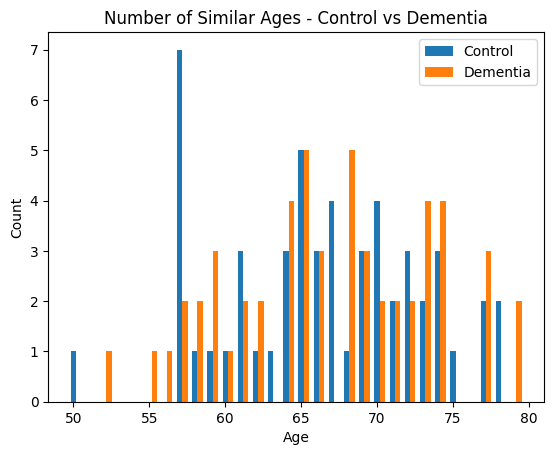

In [2]:
import matplotlib.pyplot as plt

# Get the age counts for control_df and dementia_df
control_age_counts = control_df['Age'].value_counts().sort_index()
dementia_age_counts = dementia_df['Age'].value_counts().sort_index()


# Define the bar width
bar_width = 0.35
# Calculate the x-coordinates for the bars
control_x = control_age_counts.index
dementia_x = dementia_age_counts.index + bar_width



# Plot the number of similar ages for both dataframes
plt.bar(control_x, control_age_counts.values, width=bar_width, label='Control')
plt.bar(dementia_x, dementia_age_counts.values, width=bar_width, label='Dementia')

# Set the x-axis label and y-axis label
plt.xlabel('Age')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Number of Similar Ages - Control vs Dementia')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [3]:
print("Number of entries in control_df:", control_df.shape[0])
print("Number of entries in dementia_df:", dementia_df.shape[0])


Number of entries in control_df: 54
Number of entries in dementia_df: 54


## Diagnosis

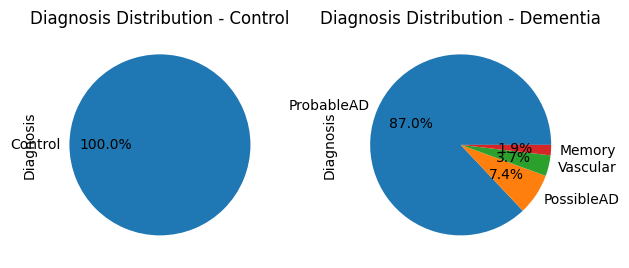

In [4]:
import matplotlib.pyplot as plt

# Plot the distribution for control_df
plt.subplot(1, 2, 1)
control_df['Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Diagnosis Distribution - Control')

# Plot the distribution for dementia_df
plt.subplot(1, 2, 2)
dementia_df['Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Diagnosis Distribution - Dementia')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


## MMSE 
The MMSE is one of the most commonly used screening tests that evaluates thinking, communication, comprehension, and memory proficiency. Results come in the form of a score that ranges from 30, which is considered normal cognition, to 0, which indicates severe cognitive impairments and potentially late-stage dementia. [\[Verywell Health\]](https://www.google.com/search?q=mmse+test+dementia&sca_esv=99e31e2f1bb1fbe7&rlz=1C5CHFA_enDE1004DE1004&sxsrf=ACQVn09kKt-TcPIcrEaNGTcXVFo61UPPyw%3A1711126017185&ei=Abb9ZffdCrOGwPAPjdi76Ac&ved=0ahUKEwi34q2TqYiFAxUzAxAIHQ3sDn0Q4dUDCBA&uact=5&oq=mmse+test+dementia&gs_lp=Egxnd3Mtd2l6LXNlcnAiEm1tc2UgdGVzdCBkZW1lbnRpYTIFEAAYgAQyBhAAGBYYHjIGEAAYFhgeMgYQABgWGB4yCxAAGIAEGIoFGIYDMgsQABiABBiKBRiGAzILEAAYgAQYigUYhgNI8Q5QtgFY1Q1wAXgBkAEAmAGLAaAB4QaqAQM2LjO4AQPIAQD4AQGYAgqgApAHwgIKEAAYRxjWBBiwA8ICDRAAGIAEGIoFGEMYsAPCAgoQABiABBgUGIcCwgIIEAAYFhgeGAqYAwCIBgGQBgqSBwM3LjOgB7M2&sclient=gws-wiz-serp#:~:text=considered%20normal%20cognition%2C-,to,-0%2C%20which%20indicates)

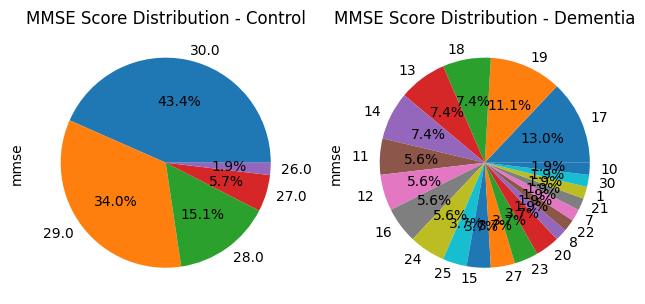

In [5]:
# Plot the distribution for control_df
plt.subplot(1, 2, 1)
control_df['mmse'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('MMSE Score Distribution - Control')

# Plot the distribution for dementia_df
plt.subplot(1, 2, 2)
dementia_df['mmse'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('MMSE Score Distribution - Dementia')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


## Text length

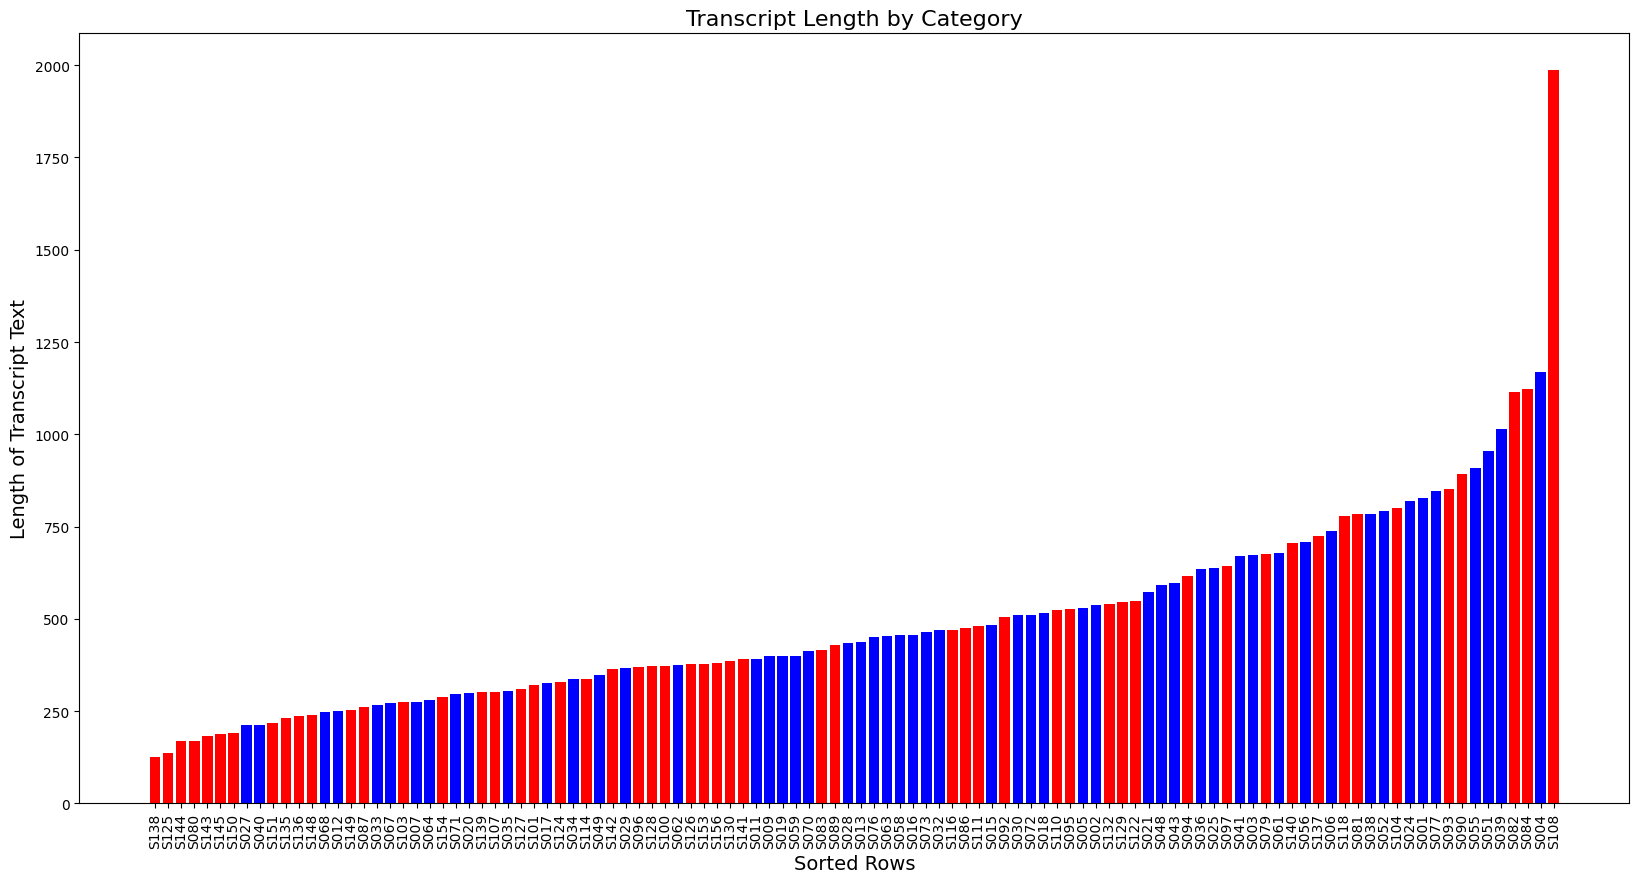

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenating the simulated dataframes
combined_df = pd.concat([control_df, dementia_df])

# Calculating the length of the Transcript texts
combined_df['TranscriptLength'] = combined_df['Transcript'].apply(len)

# Sorting the dataframe by the length of the Transcript texts
combined_df_sorted = combined_df.sort_values(by='TranscriptLength', ascending=True)

# Plotting
plt.figure(figsize=(20, 10))
bars = plt.bar(range(combined_df_sorted.shape[0]), combined_df_sorted['TranscriptLength'], color=combined_df_sorted['Category'].map({0: 'blue', 1: 'red'}))
plt.xlabel('Sorted Rows', fontsize=14)
plt.ylabel('Length of Transcript Text', fontsize=14)
plt.title('Transcript Length by Category', fontsize=16)
plt.xticks(range(combined_df_sorted.shape[0]), combined_df_sorted['Filename'], rotation=90)
plt.show()
